## Juan Pablo Montenegro Erazo - CC1007778301

Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

# 1.

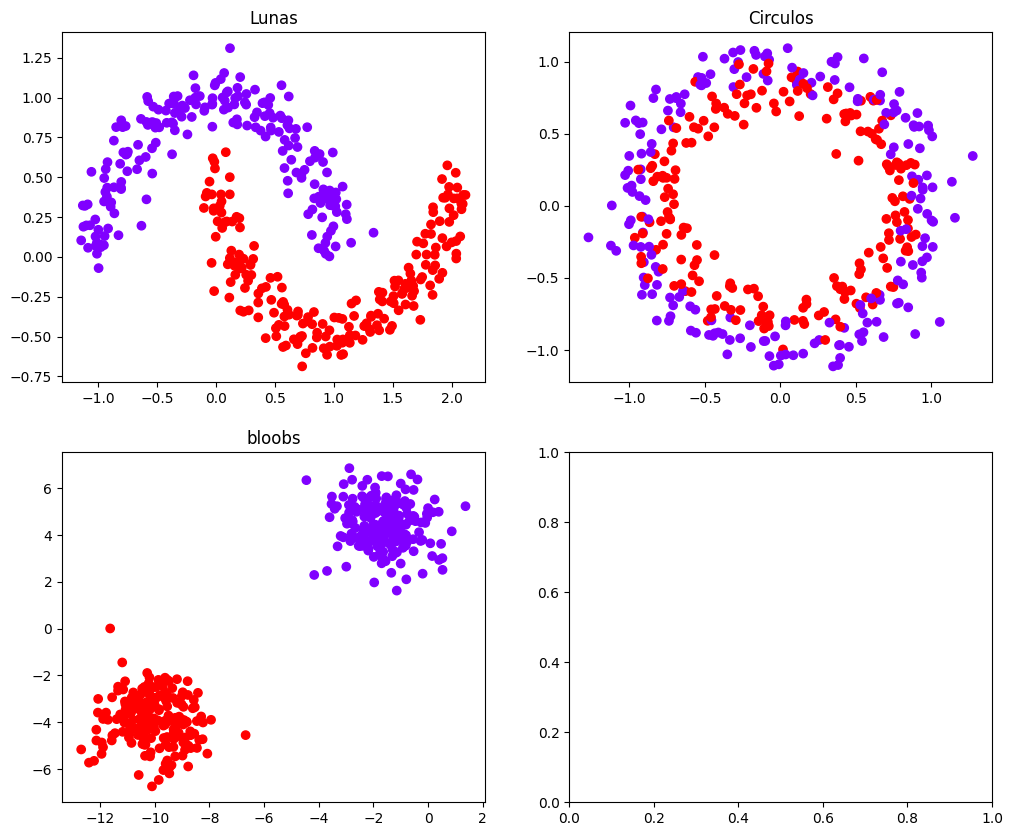

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

X_lunas, y_lunas = make_moons(n_samples=400, noise=0.1, shuffle=True,  random_state=1)
particion_lunas = train_test_split(X_lunas, y_lunas, test_size=0.2, random_state=1080)
X_lunas_entrenamiento = particion_lunas[0]
X_lunas_prueba = particion_lunas[1]
y_lunas_entrenamiento = particion_lunas[2]
y_lunas_prueba = particion_lunas[3]

X_circulos, y_circulos = make_circles(n_samples=400, noise=0.1, shuffle=True,  random_state=1)
particion_circulos = train_test_split(X_circulos, y_circulos, test_size=0.2, random_state=1080)
X_circulos_entrenamiento = particion_circulos[0]
X_circulos_prueba = particion_circulos[1]
y_circulos_entrenamiento = particion_circulos[2]
y_circulos_prueba = particion_circulos[3]

X_bloobs, y_bloobs = make_blobs(n_samples=400, centers=2, shuffle=True,  random_state=1)
particion_bloobs = train_test_split(X_bloobs, y_bloobs, test_size=0.2, random_state=1080)
X_bloobs_entrenamiento = particion_bloobs[0]
X_bloobs_prueba = particion_bloobs[1]
y_bloobs_entrenamiento = particion_bloobs[2]
y_bloobs_prueba = particion_bloobs[3]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(X_lunas[:, 0], X_lunas[:, 1], c=y_lunas, cmap='rainbow')
axs[0, 0].set_title('Lunas')
axs[0, 1].scatter(X_circulos[:, 0], X_circulos[:, 1], c=y_circulos, cmap='rainbow')
axs[0, 1].set_title('Circulos')
axs[1, 0].scatter(X_bloobs[:, 0], X_bloobs[:, 1], c=y_bloobs, cmap='rainbow')
axs[1, 0].set_title('bloobs')
plt.show()

In [2]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C':[0.001, 0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 2, 3, 4, 5, 6, 7, 8]}

diccionario_X = {'make_moons': (X_lunas_entrenamiento, X_lunas_prueba),
                 'make_circles': (X_circulos_entrenamiento, X_circulos_prueba),
                 'make_bloobs': (X_bloobs_entrenamiento, X_bloobs_prueba)}

diccionario_y = {'make_moons': (y_lunas_entrenamiento, y_lunas_prueba),
                 'make_circles': (y_circulos_entrenamiento, y_circulos_prueba),
                 'make_bloobs': (y_bloobs_entrenamiento, y_bloobs_prueba)}

diccionario_clfs = {} # Diccionario de clasificadores que usaremos en el inciso 2

for llave_X, llave_y in zip(diccionario_X.keys(), diccionario_y.keys()):
    X_entrenamiento = diccionario_X[llave_X][0]
    y_entrenamiento = diccionario_y[llave_y][0]
    X_prueba = diccionario_X[llave_X][1]
    y_prueba = diccionario_y[llave_y][1]
    clf = GridSearchCV(estimator=SVC(), param_grid = parameters, scoring='accuracy') # el nombre clf viene de clasificador
    clf.fit(X_entrenamiento, y_entrenamiento)
    diccionario_clfs[llave_X] = clf
    diccionario_respuesta = clf.best_params_
    print(f"Para el dataset {llave_X} el mejor valor del hiperparametro C, y el mejor kernel es")
    print(f"C = {diccionario_respuesta['C']}")
    print(f"Kernel: {diccionario_respuesta['kernel']}")
    print(f"Exactitud en el dataset de entrenamiento: {clf.best_score_}")
    print(f"Exactitud en el dataset de prueba: {clf.score(X_prueba, y_prueba)}\n")

Para el dataset make_moons el mejor valor del hiperparametro C, y el mejor kernel es
C = 1
Kernel: rbf
Exactitud en el dataset de entrenamiento: 1.0
Exactitud en el dataset de prueba: 0.9875

Para el dataset make_circles el mejor valor del hiperparametro C, y el mejor kernel es
C = 5
Kernel: rbf
Exactitud en el dataset de entrenamiento: 0.834375
Exactitud en el dataset de prueba: 0.8125

Para el dataset make_bloobs el mejor valor del hiperparametro C, y el mejor kernel es
C = 0.001
Kernel: linear
Exactitud en el dataset de entrenamiento: 1.0
Exactitud en el dataset de prueba: 1.0



# 2. Con los mejores párametros dibujar las fronteras de clasificación

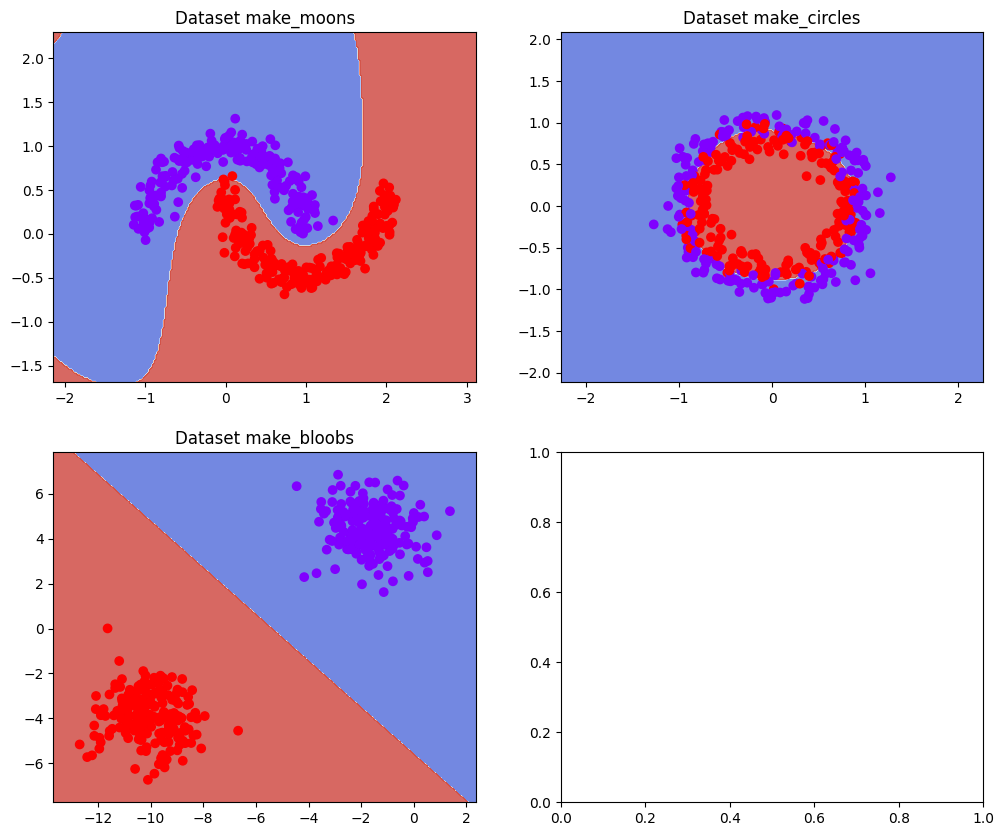

In [3]:
def make_meshgrid(x, y, h=0.02): # Codigo de la Sesion_11_SVM
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params): # Codigo de la Sesion_11_SVM
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



fig_2, axs_2 = plt.subplots(2, 2, figsize=(12, 10))
xx_lunas, yy_lunas = make_meshgrid(X_lunas[:, 0], X_lunas[:, 1])
plot_contours(axs_2[0, 0], diccionario_clfs["make_moons"], xx_lunas, yy_lunas, cmap=plt.cm.coolwarm, alpha=0.8)
axs_2[0, 0].scatter(X_lunas[:, 0], X_lunas[:, 1], c=y_lunas, cmap='rainbow')
axs_2[0, 0].set_title('Dataset make_moons')

xx_circulos, yy_circulos = make_meshgrid(X_circulos[:, 0], X_circulos[:, 1])
plot_contours(axs_2[0, 1], diccionario_clfs["make_circles"], xx_circulos, yy_circulos, cmap=plt.cm.coolwarm, alpha=0.8)
axs_2[0, 1].scatter(X_circulos[:, 0], X_circulos[:, 1], c=y_circulos, cmap='rainbow')
axs_2[0, 1].set_title('Dataset make_circles')

xx_bloobs, yy_bloobs = make_meshgrid(X_bloobs[:, 0], X_bloobs[:, 1])
plot_contours(axs_2[1, 0], diccionario_clfs["make_bloobs"], xx_bloobs, yy_bloobs, cmap=plt.cm.coolwarm, alpha=0.8)
axs_2[1, 0].scatter(X_bloobs[:, 0], X_bloobs[:, 1], c=y_bloobs, cmap='rainbow')
axs_2[1, 0].set_title('Dataset make_bloobs')

plt.show()

# 3. Con los mejores parámetros dibujar la matriz de confusion

Dataset make_moons:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



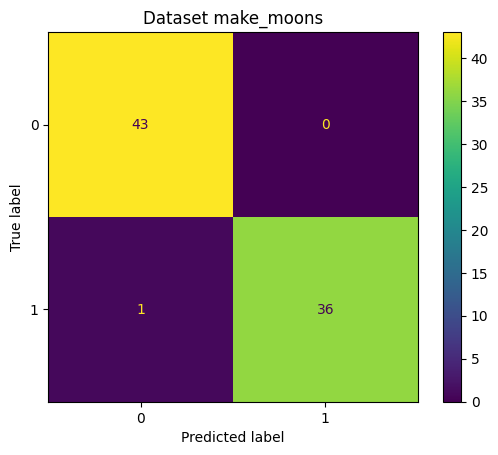

In [4]:
y_predicha = diccionario_clfs["make_moons"].predict(X_lunas_prueba)
print("Dataset make_moons:\n")
print(metrics.classification_report(y_lunas_prueba, y_predicha))
cm = metrics.confusion_matrix(y_lunas_prueba, y_predicha)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title('Dataset make_moons')
plt.show()

Dataset make_circles:

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.84      0.73      0.78        37

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



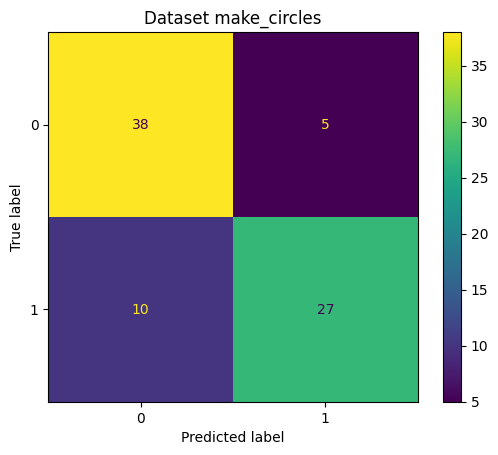

In [5]:
y_predicha = diccionario_clfs["make_circles"].predict(X_circulos_prueba)
print("Dataset make_circles:\n")
print(metrics.classification_report(y_circulos_prueba, y_predicha))
cm = metrics.confusion_matrix(y_circulos_prueba, y_predicha)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title('Dataset make_circles')
plt.show()

Dataset make_bloobs:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



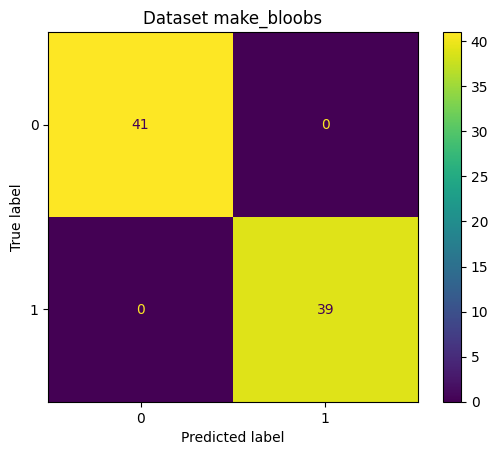

In [6]:
y_predicha = diccionario_clfs["make_bloobs"].predict(X_bloobs_prueba)
print("Dataset make_bloobs:\n")
print(metrics.classification_report(y_bloobs_prueba, y_predicha))
cm = metrics.confusion_matrix(y_bloobs_prueba, y_predicha)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title('Dataset make_bloobs')
plt.show()